# El2805 Reinforcement learning lab1 
Wei Wang[wei7@kth.se], Yuxia Wang [yuxia@kth.se]

In [2]:
import numpy as np
import maze_m as mz 
import matplotlib.pyplot as plt
import rob_bank_func as rbf

# 1. The Maze and the Random Minotaur

In [48]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

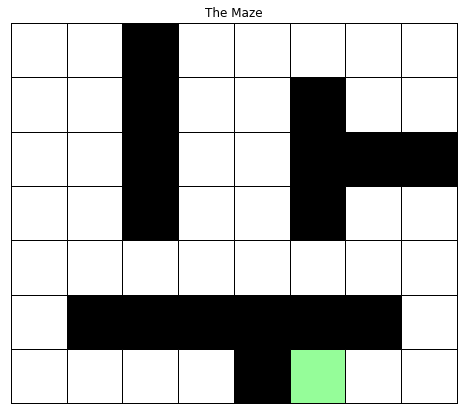

In [49]:
mz.draw_maze(maze)

# 1.1 When Minotaur can not stand still

In [36]:
env = mz.Maze(maze)

In [37]:
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

In [38]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = (0,0,6,5)
path = env.simulate(start, policy, method)

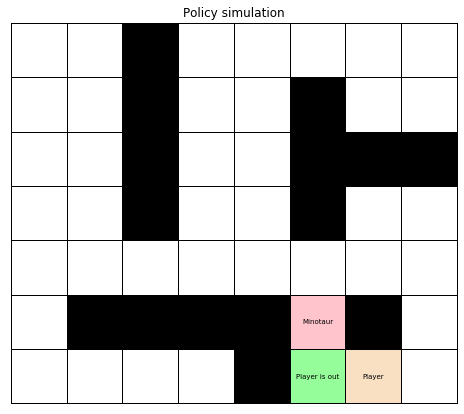

In [44]:
mz.animate_solution(maze, path)

In [50]:
env = mz.Maze(maze,mstill=False)
start  = (0,0,6,5)
start_state = env.map[start]
method = 'DynProg'
T = 20
sims = 100
max_probs = {}
for i in range(1,21):
    max_probs[i] = 0

for i in range(sims):
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,T)
    path = env.simulate(start, policy, method)
    t = len(path)
    if path[-1][0:2] == (6,5) and path[-1][2:3] != (6,5):
        max_probs[t] +=1


Text(0, 0.5, 'Max P')

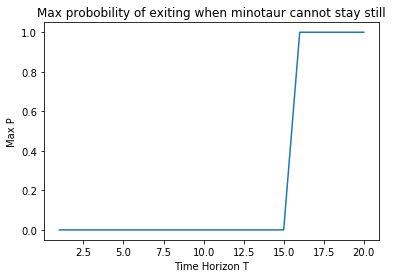

In [51]:
max_p = []
for i in range(1, 21):
    max_p.append(np.sum(max_probs[i]/100))
prob = []
for i in range (1,21):
    sum = 0
    for j in range(i):
        sum +=  max_p[j]
    prob.append(sum)
plt.plot(range(1,21),prob)
plt.title('Max probobility of exiting when minotaur cannot stay still')
plt.xlabel('Time Horizon T')
plt.ylabel('Max P')


# 1.2 When Minotaur can stand still

In [17]:
env = mz.Maze(maze, mstill=True)

In [18]:
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env,horizon);

In [19]:
method = 'DynProg';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);

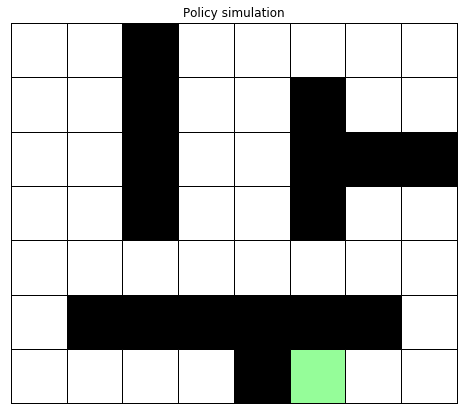

In [21]:
mz.animate_solution(maze, path)

In [15]:
env = mz.Maze(maze,mstill=True)
start  = (0,0,6,5)
start_state = env.map[start]
method = 'DynProg'
T = 20
sims = 100
max_probs = {}
for i in range(1,21):
    max_probs[i] = 0

for i in range(sims):
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,T)
    path = env.simulate(start, policy, method)
    t = len(path)
    if t!=0:
        if path[-1][0:2] == (6,5) and path[-1][2:3] != (6,5):
            max_probs[t] +=1

Text(0, 0.5, 'Max P')

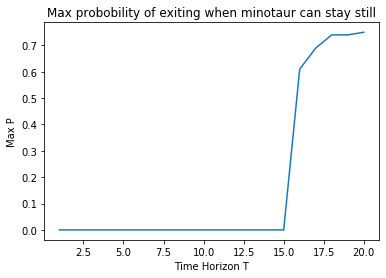

In [16]:
max_p = []
for i in range(1, 21):
    max_p.append(np.sum(max_probs[i]/100))
prob = []
for i in range (1,21):
    sum = 0
    for j in range(i):
        sum +=  max_p[j]
    prob.append(sum)
plt.plot(range(1,21),prob)
plt.title('Max probobility of exiting when minotaur can stay still')
plt.xlabel('Time Horizon T')
plt.ylabel('Max P')

# 1.3 Estimate the probability of getting out alive by simulating 10 000 games.

In [12]:
# Discount Factor 
gamma   = 29/30; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)


In [13]:
print(V)

[-12.06629596 -11.95850998 -11.9852698  ...  -1.96666667  -1.96666667
  -1.96666667]


In [14]:
print(policy)

[4 2 4 ... 1 1 1]


In [15]:
method = 'ValIter';
start  = (0,0,6,5);
path = env.simulate(start, policy, method)

In [16]:
method = 'ValIter'
sims = 10000
wins = 0
for i in range(sims):
    path = env.simulate(start, policy, method)
    if path[-1][0:2] == (6,5) and path[-1][2:3] != (6,5):
        wins += 1
print(f"Probability of exiting the maze {wins/sims}")

Probability of exiting the maze 1.0


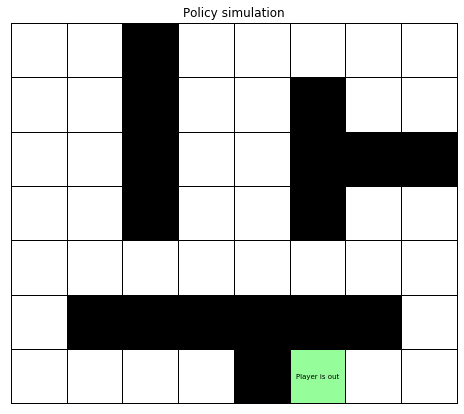

In [22]:
mz.animate_solution(maze, path)

# 2 Robbing banks

In [6]:
city = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])
start = (0, 0, 1, 2)

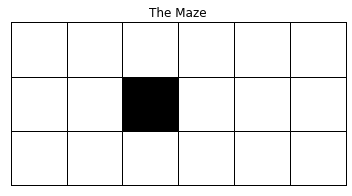

In [7]:
rbf.draw_maze(city)

In [8]:
env = rbf.Town(city, start)

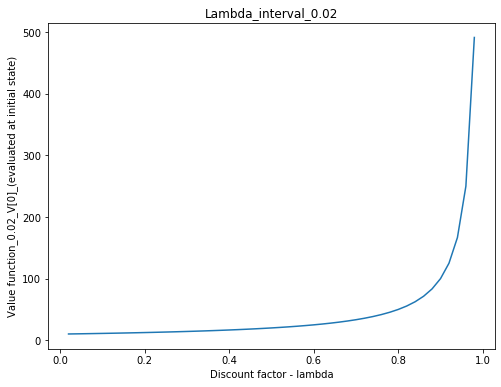

In [9]:
epsilon = 0.0001
initial_value = []
for dis_factor in np.arange(0.02, 0.99, 0.02):  
    V, policy, Q = rbf.value_iteration(env, dis_factor, epsilon)
    # initial_value.append(np.max(Q[state]))  
    initial_value.append(V[0])  # value function (evaluated at the initial state)

lambda_x = np.arange(0.02, 0.99, 0.02)

fig = plt.figure(figsize=(8, 6))
plt.plot(lambda_x, initial_value)
plt.title("Lambda_interval_0.02")
plt.xlabel("Discount factor - lambda")
plt.ylabel("Value function_0.02_V[0]_(evaluated at initial state)")
fig.savefig("Robbing_bank_0.02_V[0].png", dpi=fig.dpi)
plt.show()

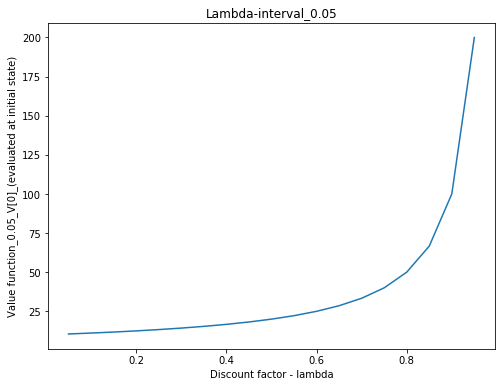

In [10]:
initial_value = []
for dis_factor in np.arange(0.05, 0.99, 0.05):  
    V, policy, Q = rbf.value_iteration(env, dis_factor, epsilon)
    initial_value.append(V[0])  # value function (evaluated at the initial state)

lambda_x = np.arange(0.05, 0.99, 0.05)

fig = plt.figure(figsize=(8, 6))
plt.plot(lambda_x, initial_value)
plt.title("Lambda-interval_0.05")
plt.xlabel("Discount factor - lambda")
plt.ylabel("Value function_0.05_V[0]_(evaluated at initial state)")
fig.savefig("Robbing_bank_0.05_V[0]_.png", dpi=fig.dpi)
plt.show()